In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
df = pd.read_csv('meal.csv')
df = df.dropna()

In [4]:
df.head()

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,83732,92670.699919,69945.934107,1,1,71,2,2,-1.0,1,...,5.397605e-79,5.397605e-79,5.397605e-79,7.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,83732,92670.699919,69945.934107,2,1,71,2,2,-1.0,1,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,83732,92670.699919,69945.934107,3,1,71,2,2,-1.0,1,...,3.830000e-01,1.000000e-03,5.397605e-79,1.500000e-02,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,83732,92670.699919,69945.934107,4,1,71,2,2,-1.0,1,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,83732,92670.699919,69945.934107,5,1,71,2,2,-1.0,1,...,5.660000e-01,4.000000e-03,5.397605e-79,1.401000e+00,1.650000e-01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [5]:
df['DR1_020'] = pd.to_datetime(df['DR1_020'], unit='s').dt.time

In [6]:
df['DR1_020'].head()

0    07:30:00
1    07:30:00
2    07:30:00
3    08:00:00
4    09:00:00
Name: DR1_020, dtype: object

In [6]:
data = df[['DR1_020', 'DR1ICARB']].copy()

In [7]:
data.index = data['DR1_020']
data = data.drop(['DR1_020'], axis=1)

In [8]:
data.shape

(110191, 1)

In [9]:
# Draw Plot
def plot_df_scatter(df, x, y, title="", xlabel='Time', ylabel='CHO Level', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.scatter(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
def plot_df_line(df, x, y, title="", xlabel='Time', ylabel='CHO Level', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

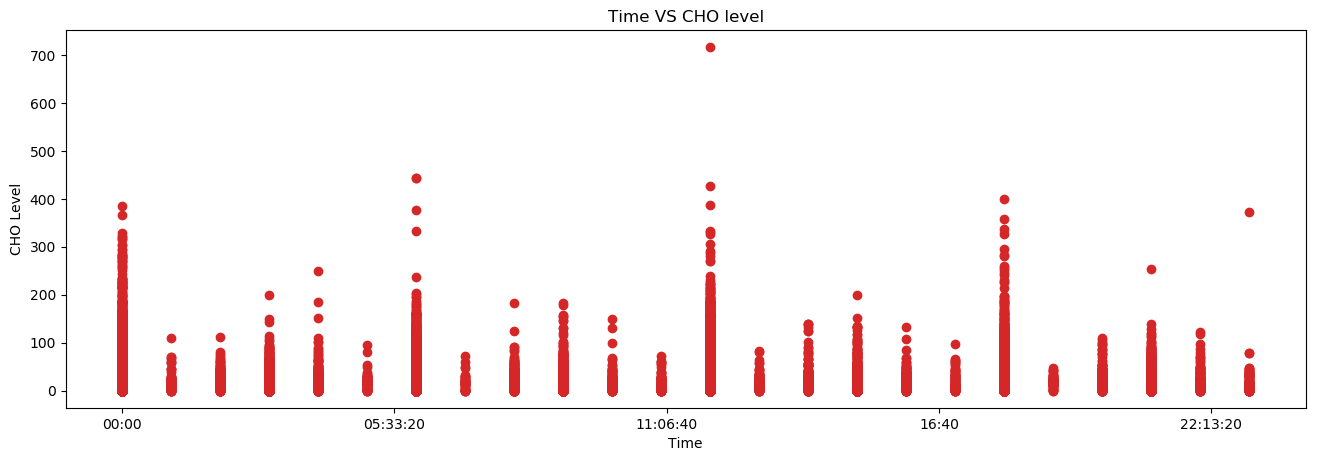

In [10]:
plot_df_scatter(data, x=data.index, y=data.DR1ICARB, title='Time VS CHO level')

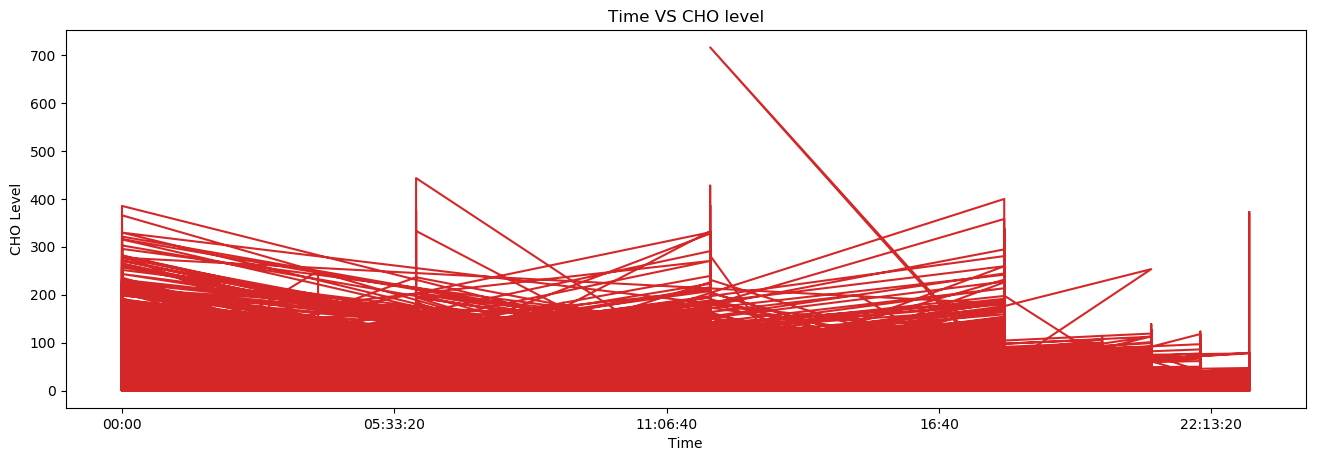

In [11]:
plot_df_line(data, x=data.index, y=data.DR1ICARB, title='Time VS CHO level')

### Augmented Dickey Fuller test to check if series is stationary.                                                     
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.
In our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.DR1ICARB.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -92.666323
p-value: 0.000000


In [13]:
# working but differencing not required
'''
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.DR1ICARB); axes[0, 0].set_title('Original Series')
plot_acf(data.DR1ICARB, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.DR1ICARB.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.DR1ICARB.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.DR1ICARB.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.DR1ICARB.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
'''

"\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\nplt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})\n# Original Series\nfig, axes = plt.subplots(3, 2, sharex=True)\naxes[0, 0].plot(data.DR1ICARB); axes[0, 0].set_title('Original Series')\nplot_acf(data.DR1ICARB, ax=axes[0, 1])\n\n# 1st Differencing\naxes[1, 0].plot(data.DR1ICARB.diff()); axes[1, 0].set_title('1st Order Differencing')\nplot_acf(data.DR1ICARB.diff().dropna(), ax=axes[1, 1])\n\n# 2nd Differencing\naxes[2, 0].plot(data.DR1ICARB.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')\nplot_acf(data.DR1ICARB.diff().diff().dropna(), ax=axes[2, 1])\n\nplt.show()\n"

### Finding the order of the AR term (p)
We can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as follows:

X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)

Because the regression model uses data from the same input variable at previous time steps, it is referred to as an autoregression (regression of self).



The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

PACF : correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.                                                                                      
PACF of lag 2 is b2 in above equation.

KeyboardInterrupt: 

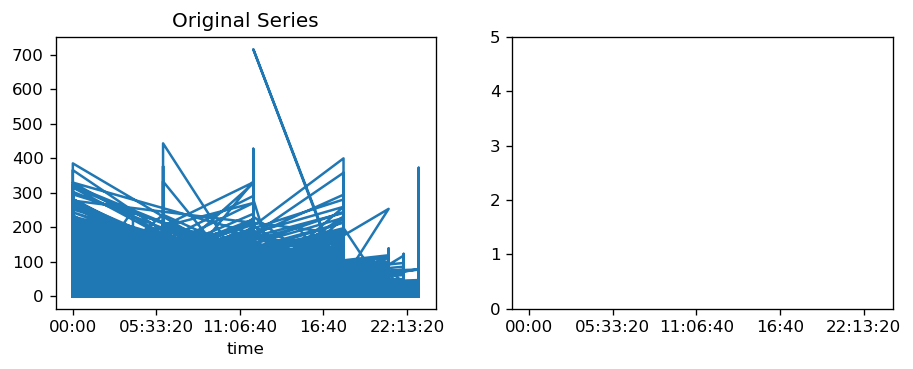

In [14]:
# PACF plot 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data.DR1ICARB); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,5))
plot_pacf(data.DR1ICARB.dropna(), ax=axes[1])

plt.show()